In [ ]:
!pip install opencv-python-headless matplotlib numpy --quiet

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu

## Create Sythatic Image

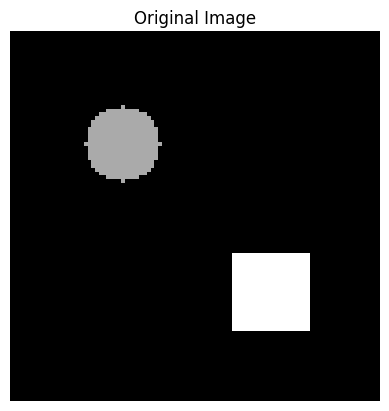

In [ ]:
def create_synthetic_image():
    img = np.zeros((100, 100), dtype=np.uint8)

    cv2.circle(img, (30, 30), 10, 100, -1)

    cv2.rectangle(img, (60, 60), (80, 80), 150, -1)

    return img

image = create_synthetic_image()
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")
plt.show()

## Adding gaussian noise to the image

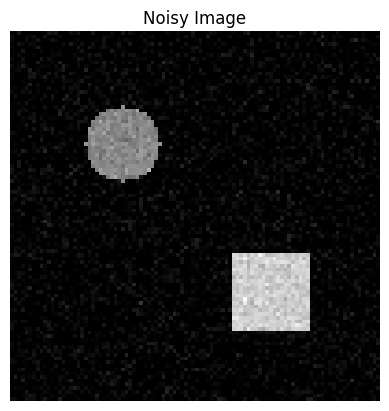

In [ ]:
def add_gaussian_noise(img, mean=0, sigma=10):
    noise = np.random.normal(mean, sigma, img.shape).astype(np.float32)
    noisy_img = img.astype(np.float32) + noise
    return np.clip(noisy_img, 0, 255).astype(np.uint8)

noisy_image = add_gaussian_noise(image)
plt.imshow(noisy_image, cmap='gray')
plt.title("Noisy Image")
plt.axis("off")
plt.show()

## Applying Otsu algorithm

Otsu's threshold value: 40


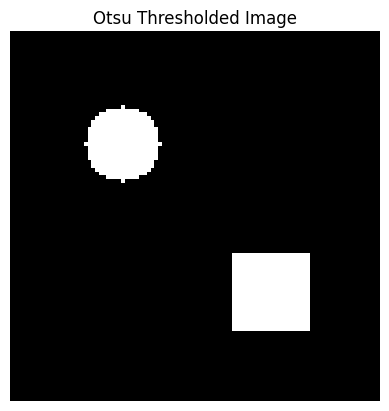

In [ ]:
def apply_otsu(img):
    thresh_value = threshold_otsu(img)
    binary = img > thresh_value
    return binary.astype(np.uint8) * 255, thresh_value

otsu_image, threshold_val = apply_otsu(noisy_image)
print(f"Otsu's threshold value: {threshold_val}")
plt.imshow(otsu_image, cmap='gray')
plt.title("Otsu Thresholded Image")
plt.axis("off")
plt.show()

## Implementation of region-growing technique for image segmentation

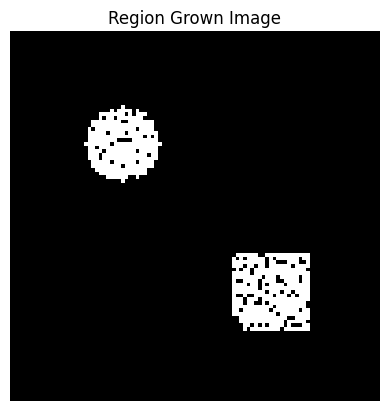

In [ ]:
def region_growing(img, seeds, threshold=10):
    visited = np.zeros_like(img, dtype=bool)
    region = np.zeros_like(img, dtype=np.uint8)

    height, width = img.shape
    directions = [(-1,0),(1,0),(0,-1),(0,1)]

    for seed in seeds:
        x, y = seed
        seed_val = img[x, y]
        stack = [(x, y)]

        while stack:
            i, j = stack.pop()
            if visited[i, j]:
                continue

            visited[i, j] = True
            region[i, j] = 255

            for dx, dy in directions:
                ni, nj = i + dx, j + dy
                if 0 <= ni < height and 0 <= nj < width and not visited[ni, nj]:
                    if abs(int(img[ni, nj]) - int(seed_val)) <= threshold:
                        stack.append((ni, nj))

    return region

seeds = [(30, 30), (70, 70)]
region_image = region_growing(noisy_image, seeds, threshold=20)
plt.imshow(region_image, cmap='gray')
plt.title("Region Grown Image")
plt.axis("off")
plt.show()